In [447]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

import requests
from bs4 import BeautifulSoup

In [448]:
links_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Machine_Learning/Web Projects/Movies Recommendation System/datasets/links.csv")
movies_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Machine_Learning/Web Projects/Movies Recommendation System/datasets/movies_metadata.csv")
ratings_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Machine_Learning/Web Projects/Movies Recommendation System/datasets/ratings_small.csv")
keywords_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Machine_Learning/Web Projects/Movies Recommendation System/datasets/keywords.csv")
credits_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Machine_Learning/Web Projects/Movies Recommendation System/datasets/credits.csv")

In [449]:
keywords_df.drop_duplicates("id", inplace=True)
credits_df.drop_duplicates("id", inplace=True)

In [450]:
credits_df = credits_df.rename(columns={"id": "tmdbId"})
keywords_df = keywords_df.rename(columns={"id": "tmdbId"})


In [451]:
movies_df.columns

Index(['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'production_companies', 'production_countries',
       'release_date', 'revenue', 'runtime', 'spoken_languages', 'status',
       'tagline', 'title', 'video', 'vote_average', 'vote_count'],
      dtype='object')

In [452]:
movies_df.head(2)

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,30-10-95,373554033,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,15-12-95,262797249,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413


In [453]:
links_df.head()

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


In [454]:
movies_df["id"].isnull().sum()

0

In [455]:
links_df["tmdbId"].isnull().sum()

219

In [456]:
links_df = links_df[links_df["tmdbId"].notnull()]

---
#### after some analysis I've found that the ***movies_df's "id"*** column is actually the ***tmdb Id of that movie***.
#### which matches with the ***links_df's tmdbId*** column...
---

In [457]:
links_df["tmdbId"] = links_df["tmdbId"].astype('int64')

links_df.head()

,movieId,imdbId,tmdbId
0,1,114709,862
1,2,113497,8844
2,3,113228,15602
3,4,114885,31357
4,5,113041,11862


In [458]:
movies_df.head(1)

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,30-10-95,373554033,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415


In [459]:
movies_df.loc[(movies_df["id"] == '1997-08-20')]["id"], movies_df.loc[(movies_df["id"] == '2012-09-29')]["id"], movies_df.loc[(movies_df["id"] == '2014-01-01')]["id"]

(Series([], Name: id, dtype: int64),
 Series([], Name: id, dtype: int64),
 Series([], Name: id, dtype: int64))

---
##### movies_df's index [19730, 29503, 35587] ***ID***(s) are invalid
##### so we're dropping these indices..

In [460]:
# movies_df.drop([19730, 29503, 35587], axis=0, inplace=True)

In [461]:
movies_df["id"].isnull().sum()

0

In [462]:
movies_df.rename(columns={"id": "tmdbId"}, inplace=True)

In [463]:
movies_df["tmdbId"].astype('int')

0          862
1         8844
2        15602
3          949
4          710
         ...  
4998    407448
4999     54559
5000    417320
5001    265189
5002    455661
Name: tmdbId, Length: 5003, dtype: int64

In [464]:
movies_df["tmdbId"] = movies_df["tmdbId"].astype('int')

movies_df.head(2)

,adult,belongs_to_collection,budget,genres,homepage,tmdbId,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,30-10-95,373554033,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,15-12-95,262797249,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413


---
#### now, fun part... 😉
#### I'm going to include some update new movies according to 2023 new releases...
##### **like**: *John Wick: Chapter 4, Avatar: The Way of Water, John Wick: Chapter 3 - Parabellum*
---

In [465]:

def include_new_movies(tmdbIDs):
  movie_dic_list = []
  keys = list(movies_df.columns)

  for tmdbID in tmdbIDs:
    movie_dic = {}
    json = requests.get(f"http://api.themoviedb.org/3/movie/{tmdbID}?api_key=8265bd1679663a7ea12ac168da84d2e8").json()

    for i in range(len(keys)):
      if i == 5:
        movie_dic[keys[i]] = tmdbID
      else:
        movie_dic[keys[i]] = str(json[keys[i]])

    movie_dic_list.append(movie_dic)
  
  return pd.DataFrame(movie_dic_list, columns=keys, index=np.arange(0, len(tmdbIDs)))

In [466]:
include_new_movies([458156, 76600, 603692, 24428, 124905, 373571, 399566, 293167, 420634, 663712, 346364, 474350])

,adult,belongs_to_collection,budget,genres,homepage,tmdbId,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 404609, 'name': 'John Wick Collection',...",55000000,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",https://www.lionsgate.com/movies/john-wick-cha...,458156,tt6146586,en,John Wick: Chapter 3 - Parabellum,Super-assassin John Wick returns with a $14 mi...,...,2019-05-15,326709727,131,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Every action has consequences.,John Wick: Chapter 3 - Parabellum,False,7.4,8643
1,False,"{'id': 87096, 'name': 'Avatar Collection', 'po...",460000000,"[{'id': 878, 'name': 'Science Fiction'}, {'id'...",https://www.avatar.com/movies/avatar-the-way-o...,76600,tt1630029,en,Avatar: The Way of Water,Set more than a decade after the events of the...,...,2022-12-14,2247708213,192,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Return to Pandora.,Avatar: The Way of Water,False,7.727,5419
2,False,"{'id': 404609, 'name': 'John Wick Collection',...",0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",https://johnwick.movie,603692,tt10366206,en,John Wick: Chapter 4,"With the price on his head ever increasing, Jo...",...,2023-03-22,0,169,"[{'english_name': 'English', 'iso_639_1': 'en'...",Post Production,"No way back, one way out.",John Wick: Chapter 4,False,0.0,0
3,False,"{'id': 86311, 'name': 'The Avengers Collection...",220000000,"[{'id': 878, 'name': 'Science Fiction'}, {'id'...",https://www.marvel.com/movies/the-avengers,24428,tt0848228,en,The Avengers,When an unexpected enemy emerges and threatens...,...,2012-04-25,1518815515,143,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Some assembly required.,The Avengers,False,7.706,28219
4,False,"{'id': 535313, 'name': 'Godzilla Collection', ...",160000000,"[{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...",http://www.godzillamovie.com,124905,tt0831387,en,Godzilla,"Ford Brody, a Navy bomb expert, has just reuni...",...,2014-05-14,529076069,123,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,"The world ends, Godzilla begins.",Godzilla,False,6.269,8038
5,False,"{'id': 535313, 'name': 'Godzilla Collection', ...",170000000,"[{'id': 878, 'name': 'Science Fiction'}, {'id'...",http://www.godzillamovie.com,373571,tt3741700,en,Godzilla: King of the Monsters,Follows the heroic efforts of the crypto-zoolo...,...,2019-05-29,386600138,132,"[{'english_name': 'Mandarin', 'iso_639_1': 'zh...",Released,Long live the king.,Godzilla: King of the Monsters,False,6.669,5195
6,False,"{'id': 535313, 'name': 'Godzilla Collection', ...",200000000,"[{'id': 28, 'name': 'Action'}, {'id': 14, 'nam...",https://www.warnerbros.com/movies/godzilla-vs-...,399566,tt5034838,en,Godzilla vs. Kong,"In a time when monsters walk the Earth, humani...",...,2021-03-24,470116094,114,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,One Will Fall,Godzilla vs. Kong,False,7.704,8572
7,False,None,185000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",http://kongskullislandmovie.com/,293167,tt3731562,en,Kong: Skull Island,Explore the mysterious and dangerous home of t...,...,2017-03-08,566652812,118,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,All hail the king,Kong: Skull Island,False,6.508,9365
8,False,"{'id': 727761, 'name': 'Terrifier Collection',...",100000,"[{'id': 27, 'name': 'Horror'}, {'id': 53, 'nam...",,420634,tt4281724,en,Terrifier,"On Halloween night, a young woman finds hersel...",...,2016-03-15,0,84,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,There is nothing more frightening than a clown...,Terrifier,False,6.587,1408
9,False,"{'id': 727761, 'name': 'Terrifier Collection',...",250000,"[{'id': 27, 'name': 'Horror'}]",http://www.terrifier2themovie.com/,663712,tt10403420,en,Terrifier 2,"After being resurrected by a sinister entity, ...",...,2022-10-06,12400000,138,"[{'englis

In [467]:
new_includes = include_new_movies([458156, 76600, 603692, 24428, 124905, 373571, 399566, 293167, 420634, 663712, 346364, 474350])

In [468]:
new_includes_tmdbIds = new_includes["tmdbId"].tolist()
new_includes_imdbIds = new_includes["imdb_id"].tolist()

new_includes_tmdbIds, new_includes_imdbIds

([458156,
  76600,
  603692,
  24428,
  124905,
  373571,
  399566,
  293167,
  420634,
  663712,
  346364,
  474350],
 ['tt6146586',
  'tt1630029',
  'tt10366206',
  'tt0848228',
  'tt0831387',
  'tt3741700',
  'tt5034838',
  'tt3731562',
  'tt4281724',
  'tt10403420',
  'tt1396484',
  'tt7349950'])

In [469]:
## update movies include into previous "movies_df"

movies_df = pd.concat((movies_df, new_includes), axis=0).reset_index(drop=True)

In [470]:
movies_df.tail()

,adult,belongs_to_collection,budget,genres,homepage,tmdbId,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
5010,False,None,185000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",http://kongskullislandmovie.com/,293167,tt3731562,en,Kong: Skull Island,Explore the mysterious and dangerous home of t...,...,2017-03-08,566652812,118,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,All hail the king,Kong: Skull Island,False,6.508,9365
5011,False,"{'id': 727761, 'name': 'Terrifier Collection',...",100000,"[{'id': 27, 'name': 'Horror'}, {'id': 53, 'nam...",,420634,tt4281724,en,Terrifier,"On Halloween night, a young woman finds hersel...",...,2016-03-15,0,84,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,There is nothing more frightening than a clown...,Terrifier,False,6.587,1408
5012,False,"{'id': 727761, 'name': 'Terrifier Collection',...",250000,"[{'id': 27, 'name': 'Horror'}]",http://www.terrifier2themovie.com/,663712,tt10403420,en,Terrifier 2,"After being resurrected by a sinister entity, ...",...,2022-10-06,12400000,138,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Who's laughing now?,Terrifier 2,False,7.0,1025
5013,False,"{'id': 477962, 'name': 'It Collection', 'poste...",35000000,"[{'id': 27, 'name': 'Horror'}, {'id': 14, 'nam...",http://itthemovie.com/,346364,tt1396484,en,It,"In a small town in Maine, seven children known...",...,2017-09-06,701842551,135,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Your fears are unleashed,It,False,7.236,17362
5014,False,"{'id': 477962, 'name': 'It Collection', 'poste...",79000000,"[{'id': 27, 'name': 'Horror'}, {'id': 14, 'nam...",http://www.it-movie.net/,474350,tt7349950,en,It Chapter Two,27 years after overcoming the malevolent super...,...,2019-09-04,473122525,169,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,You'll Float Again,It Chapter Two,False,6.866,7546


In [471]:
links_df.tail()

,movieId,imdbId,tmdbId
45838,176269,6209470,439050
45839,176271,2028550,111109
45840,176273,303758,67758
45841,176275,8536,227506
45842,176279,6980792,461257


In [472]:
movies_df["release_date"] = pd.to_datetime(movies_df["release_date"])
movies_df["release_date"] = movies_df["release_date"].apply(lambda x : x.year)

movies_df.head()

,adult,belongs_to_collection,budget,genres,homepage,tmdbId,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995,373554033,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995,262797249,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995,0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92
3,False,NaN,60000000,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",NaN,949,tt0113277,en,Heat,"Obsessive master thief, Neil McCauley leads a ...",...,1995,187436818,170.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,A Los Angeles Crime Saga,Heat,False,7.7,1886
4,False,"{'id': 645, 'name': 'James Bond Collection', '...",58000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",http://www.mgm.com/view/movie/757/Goldeneye/,710,tt0113189,en,GoldenEye,James Bond must unmask the mysterious head of ...,...,1995,352194034,130.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,No limits. No fears. No substitutes.,GoldenEye,False,6.6,1194


In [473]:
movies_df.columns

Index(['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage',
       'tmdbId', 'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'production_companies', 'production_countries',
       'release_date', 'revenue', 'runtime', 'spoken_languages', 'status',
       'tagline', 'title', 'video', 'vote_average', 'vote_count'],
      dtype='object')

In [474]:
movies_df = movies_df[['genres', 'tmdbId', 'imdb_id', 'original_language', 'overview', 'popularity', 'runtime', 'status', 'tagline', 'title', 'vote_average', 'vote_count', 'release_date']]

In [475]:
movies_df["title"] = movies_df["title"].apply(lambda x:x.replace("III", "3"))
movies_df["title"] = movies_df["title"].apply(lambda x:x.replace("II", "2"))

In [476]:
movies_df.tail()

,genres,tmdbId,imdb_id,original_language,overview,popularity,runtime,status,tagline,title,vote_average,vote_count,release_date
5010,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",293167,tt3731562,en,Explore the mysterious and dangerous home of t...,55.327,118,Released,All hail the king,Kong: Skull Island,6.508,9365,2017
5011,"[{'id': 27, 'name': 'Horror'}, {'id': 53, 'nam...",420634,tt4281724,en,"On Halloween night, a young woman finds hersel...",98.926,84,Released,There is nothing more frightening than a clown...,Terrifier,6.587,1408,2016
5012,"[{'id': 27, 'name': 'Horror'}]",663712,tt10403420,en,"After being resurrected by a sinister entity, ...",333.112,138,Released,Who's laughing now?,Terrifier 2,7.0,1025,2022
5013,"[{'id': 27, 'name': 'Horror'}, {'id': 14, 'nam...",346364,tt1396484,en,"In a small town in Maine, seven children known...",53.538,135,Released,Your fears are unleashed,It,7.236,17362,2017
5014,"[{'id': 27, 'name': 'Horror'}, {'id': 14, 'nam...",474350,tt7349950,en,27 years after overcoming the malevolent super...,72.199,169,Released,You'll Float Again,It Chapter Two,6.866,7546,2019


In [477]:
from ast import literal_eval

# literal_eval(credits_df.loc[credits_df["tmdbId"] == 324552]["cast"].tolist()[0])

credits_df.head()

,cast,crew,tmdbId
0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",862
1,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",8844
2,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...",15602
3,"[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de...",31357
4,"[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de...",11862


In [478]:
## Cast Character getting for new movies...

def cast_getting_web(imdbID):
  URL = f"https://m.imdb.com/title/{imdbID}/fullcredits/cast"
  r = requests.get(URL)

  soup = BeautifulSoup(r.content, 'html5lib')
  cast_list = []

  real_names = list(map(lambda x : str(x.text).strip().replace('\n', ' '), soup.findAll("h4")))[:10]
  character_names = list(map(lambda x : str(x.text).strip().replace('\n', ' '), soup.findAll("p", attrs={"class": "h4 unbold"})))[:10]

  for i in range(len(real_names)):
    cast_dict = {}

    cast_dict["character"] = character_names[i]
    cast_dict["name"] = real_names[i]

    cast_list.append(cast_dict)

  return str(cast_list)

In [479]:
cast_getting_web("tt10366206")

"[{'character': 'John Wick', 'name': 'Keanu Reeves'}, {'character': 'Caine', 'name': 'Donnie Yen'}, {'character': 'Marquis', 'name': 'Bill Skarsgård'}, {'character': 'Bowery King', 'name': 'Laurence Fishburne'}, {'character': 'Shimazu', 'name': 'Hiroyuki Sanada'}, {'character': 'Tracker', 'name': 'Shamier Anderson'}, {'character': 'Charon', 'name': 'Lance Reddick'}, {'character': 'Akira', 'name': 'Rina Sawayama'}, {'character': 'Killa', 'name': 'Scott Adkins'}, {'character': 'Winston', 'name': 'Ian McShane'}]"

In [480]:
credits_df.head()

,cast,crew,tmdbId
0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",862
1,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",8844
2,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...",15602
3,"[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de...",31357
4,"[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de...",11862


In [481]:
## new Movie's Cast..
new_casts = []

for imdbID in new_includes_imdbIds:
  new_casts.append(cast_getting_web(imdbID))

new_casts = pd.DataFrame(new_casts, columns=["cast"])
new_casts = pd.concat((new_casts, pd.DataFrame(new_includes_tmdbIds, columns=["tmdbId"])), axis=1)

# new_casts


## new Movie's Crew (Director only)..
new_crews = []

for direc in ["Chad Stahelski","James Cameron","Chad Stahelski","Joss Whedon","Gareth Edwards","Michael Dougherty","Adam Wingard", "Jordan Vogt-Roberts", "Damien Leone", "Damien Leone", "Andy Muschietti", "Andy Muschietti"]:
  new_crews.append('''[{'job': 'Director', 'name': ''' + f"'{direc}'" + "}]")

new_crews = pd.DataFrame(new_crews, columns=["crew"])
new_crews = pd.concat((new_crews, pd.DataFrame(new_includes_tmdbIds, columns=["tmdbId"])), axis=1)

# new_crews

new_cast_crew = pd.merge(new_casts, new_crews, on="tmdbId")[["cast", "crew", "tmdbId"]]

new_cast_crew


,cast,crew,tmdbId
0,"[{'character': 'John Wick', 'name': 'Keanu Ree...","[{'job': 'Director', 'name': 'Chad Stahelski'}]",458156
1,"[{'character': 'Jake', 'name': 'Sam Worthingto...","[{'job': 'Director', 'name': 'James Cameron'}]",76600
2,"[{'character': 'John Wick', 'name': 'Keanu Ree...","[{'job': 'Director', 'name': 'Chad Stahelski'}]",603692
3,"[{'character': 'Tony Stark / Iron Man', 'name'...","[{'job': 'Director', 'name': 'Joss Whedon'}]",24428
4,"[{'character': 'Ford Brody', 'name': 'Aaron Ta...","[{'job': 'Director', 'name': 'Gareth Edwards'}]",124905
5,"[{'character': 'Dr. Mark Russell', 'name': 'Ky...","[{'job': 'Director', 'name': 'Michael Doughert...",373571
6,"[{'character': 'Nathan Lind', 'name': 'Alexand...","[{'job': 'Director', 'name': 'Adam Wingard'}]",399566
7,"[{'character': 'James Conrad', 'name': 'Tom Hi...","[{'job': 'Director', 'name': 'Jordan Vogt-Robe...",293167
8,"[{'character': 'Tara Heyes', 'name': 'Jenna Ka...","[{'job': 'Director', 'name': 'Damien Leone'}]",420634
9,"[{'character': 'Sienna', 'name': 'Lauren LaVer...","[{'job': 'Director', 'name': 'Damien Leone'}]",663712


In [482]:
for dic in literal_eval(credits_df.loc[credits_df["tmdbId"] == 324552]["crew"].tolist()[0]):
  if dic["job"] == "Director":
    print(dic)

{'credit_id': '56cf3b519251413e59002e0a', 'department': 'Directing', 'gender': 2, 'id': 40644, 'job': 'Director', 'name': 'Chad Stahelski', 'profile_path': '/hr82USXEc8XWvdnH0TpyddMpi7j.jpg'}


----
### "credits_df" final with update Movies...
---

In [483]:
credits_df = pd.concat((credits_df, new_cast_crew), axis=0).reset_index(drop=True)

credits_df.tail()

,cast,crew,tmdbId
45439,"[{'character': 'James Conrad', 'name': 'Tom Hi...","[{'job': 'Director', 'name': 'Jordan Vogt-Robe...",293167
45440,"[{'character': 'Tara Heyes', 'name': 'Jenna Ka...","[{'job': 'Director', 'name': 'Damien Leone'}]",420634
45441,"[{'character': 'Sienna', 'name': 'Lauren LaVer...","[{'job': 'Director', 'name': 'Damien Leone'}]",663712
45442,[{'character': 'Bill Denbrough (as Jaeden Lieb...,"[{'job': 'Director', 'name': 'Andy Muschietti'}]",346364
45443,"[{'character': 'Beverly Marsh', 'name': 'Jessi...","[{'job': 'Director', 'name': 'Andy Muschietti'}]",474350


In [484]:
## Cast Character getting for new movies...

def keywords_getting_web(imdbID):
  URL = f"https://m.imdb.com/title/{imdbID}/keywords"
  r = requests.get(URL)
  keywords_list = []

  soup = BeautifulSoup(r.content, 'html5lib')

  for i, row in enumerate(soup.findAll("div", attrs={"class": "sodatext"})[:15]):             ## top 15 Keywords fetching..
    keywords_dict = {}
    keyword = str(row.text).strip().replace("\n", " ")
    keywords_dict["id"] = i+1
    keywords_dict["name"] = keyword

    keywords_list.append(keywords_dict)

  return str(keywords_list)

In [485]:
keywords_getting_web("tt1630029")

"[{'id': 1, 'name': 'underwater'}, {'id': 2, 'name': 'ocean'}, {'id': 3, 'name': 'jungle'}, {'id': 4, 'name': 'water'}, {'id': 5, 'name': 'second part'}, {'id': 6, 'name': 'sequel'}, {'id': 7, 'name': 'science fantasy'}, {'id': 8, 'name': 'forest'}, {'id': 9, 'name': 'future'}, {'id': 10, 'name': 'native'}, {'id': 11, 'name': 'alien'}, {'id': 12, 'name': 'planet'}, {'id': 13, 'name': 'director also editor'}, {'id': 14, 'name': 'alien race'}, {'id': 15, 'name': 'tribe'}]"

In [486]:
keywords_df.head()

,tmdbId,keywords
0,862,"[{'id': 931, 'name': 'jealousy'}, {'id': 4290,..."
1,8844,"[{'id': 10090, 'name': 'board game'}, {'id': 1..."
2,15602,"[{'id': 1495, 'name': 'fishing'}, {'id': 12392..."
3,31357,"[{'id': 818, 'name': 'based on novel'}, {'id':..."
4,11862,"[{'id': 1009, 'name': 'baby'}, {'id': 1599, 'n..."


In [487]:
## new Movie's Keywords..
new_keywords = []

for imdbID in new_includes_imdbIds:
  new_keywords.append(keywords_getting_web(imdbID))

new_keywords = pd.DataFrame(new_keywords, columns=["keywords"])
new_keywords = pd.concat((pd.DataFrame(new_includes_tmdbIds, columns=["tmdbId"]), new_keywords), axis=1)

new_keywords

,tmdbId,keywords
0,458156,"[{'id': 1, 'name': 'third part'}, {'id': 2, 'n..."
1,76600,"[{'id': 1, 'name': 'underwater'}, {'id': 2, 'n..."
2,603692,"[{'id': 1, 'name': 'the high table'}, {'id': 2..."
3,24428,"[{'id': 1, 'name': 'superhero'}, {'id': 2, 'na..."
4,124905,"[{'id': 1, 'name': 'godzilla'}, {'id': 2, 'nam..."
5,373571,"[{'id': 1, 'name': 'monster'}, {'id': 2, 'name..."
6,399566,"[{'id': 1, 'name': 'monster versus monster'}, ..."
7,293167,"[{'id': 1, 'name': 'giant monster'}, {'id': 2,..."
8,420634,"[{'id': 1, 'name': 'killer clown'}, {'id': 2, ..."
9,663712,"[{'id': 1, 'name': 'halloween'}, {'id': 2, 'na..."


----
### "keywords_df" final with update Movies...
---

In [488]:
keywords_df = pd.concat((keywords_df, new_keywords), axis=0).reset_index(drop=True)

keywords_df.tail()

,tmdbId,keywords
45439,293167,"[{'id': 1, 'name': 'giant monster'}, {'id': 2,..."
45440,420634,"[{'id': 1, 'name': 'killer clown'}, {'id': 2, ..."
45441,663712,"[{'id': 1, 'name': 'halloween'}, {'id': 2, 'na..."
45442,346364,"[{'id': 1, 'name': 'based on novel'}, {'id': 2..."
45443,474350,"[{'id': 1, 'name': 'killer clown'}, {'id': 2, ..."


In [489]:
keywords_df.drop_duplicates("tmdbId", inplace=True)
credits_df.drop_duplicates("tmdbId", inplace=True)

keywords_df["tmdbId"].duplicated().sum(), credits_df["tmdbId"].duplicated().sum()

(0, 0)

In [490]:
credits_df.tail()

,cast,crew,tmdbId
45438,"[{'character': 'Nathan Lind', 'name': 'Alexand...","[{'job': 'Director', 'name': 'Adam Wingard'}]",399566
45440,"[{'character': 'Tara Heyes', 'name': 'Jenna Ka...","[{'job': 'Director', 'name': 'Damien Leone'}]",420634
45441,"[{'character': 'Sienna', 'name': 'Lauren LaVer...","[{'job': 'Director', 'name': 'Damien Leone'}]",663712
45442,[{'character': 'Bill Denbrough (as Jaeden Lieb...,"[{'job': 'Director', 'name': 'Andy Muschietti'}]",346364
45443,"[{'character': 'Beverly Marsh', 'name': 'Jessi...","[{'job': 'Director', 'name': 'Andy Muschietti'}]",474350


In [491]:
movies_df.drop_duplicates("title", inplace=True)

In [492]:

movies_df["title"] = movies_df["title"].apply(lambda x : str(x).lower())                 ## Generalizing Movie's Titles to prevent case-sensitivity when searching...


In [493]:
movies_df = movies_df[movies_df["vote_count"].notnull()]

movies_df["genres"].fillna("[]", inplace=True)
movies_df["overview"].fillna("", inplace=True)

In [494]:
movies_df.head()

,genres,tmdbId,imdb_id,original_language,overview,popularity,runtime,status,tagline,title,vote_average,vote_count,release_date
0,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",862,tt0114709,en,"Led by Woody, Andy's toys live happily in his ...",21.946943,81.0,Released,NaN,toy story,7.7,5415,1995
1,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",8844,tt0113497,en,When siblings Judy and Peter discover an encha...,17.015539,104.0,Released,Roll the dice and unleash the excitement!,jumanji,6.9,2413,1995
2,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",15602,tt0113228,en,A family wedding reignites the ancient feud be...,11.7129,101.0,Released,Still Yelling. Still Fighting. Still Ready for...,grumpier old men,6.5,92,1995
3,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",949,tt0113277,en,"Obsessive master thief, Neil McCauley leads a ...",17.924927,170.0,Released,A Los Angeles Crime Saga,heat,7.7,1886,1995
4,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",710,tt0113189,en,James Bond must unmask the mysterious head of ...,14.686036,130.0,Released,No limits. No fears. No substitutes.,goldeneye,6.6,1194,1995


In [495]:
# movies_df.loc[movies_df["tmdbId"] == 603692]

# [458156, 76600, 603692]

In [496]:
## extracting values from string type..

def convert_1(x):
  lst = literal_eval(x)
  genres = list(map(lambda x : x["name"], lst))

  return genres

In [497]:
movies_df["genres"][0]

"[{'id': 16, 'name': 'Animation'}, {'id': 35, 'name': 'Comedy'}, {'id': 10751, 'name': 'Family'}]"

In [498]:
movies_df["genres"] = movies_df["genres"].apply(lambda x : convert_1(x))

In [499]:
movies_df["vote_count"] = movies_df["vote_count"].astype('float')
movies_df["vote_average"] = movies_df["vote_average"].astype('float')

In [500]:
movies_df.head()

,genres,tmdbId,imdb_id,original_language,overview,popularity,runtime,status,tagline,title,vote_average,vote_count,release_date
0,"[Animation, Comedy, Family]",862,tt0114709,en,"Led by Woody, Andy's toys live happily in his ...",21.946943,81.0,Released,NaN,toy story,7.7,5415.0,1995
1,"[Adventure, Fantasy, Family]",8844,tt0113497,en,When siblings Judy and Peter discover an encha...,17.015539,104.0,Released,Roll the dice and unleash the excitement!,jumanji,6.9,2413.0,1995
2,"[Romance, Comedy]",15602,tt0113228,en,A family wedding reignites the ancient feud be...,11.7129,101.0,Released,Still Yelling. Still Fighting. Still Ready for...,grumpier old men,6.5,92.0,1995
3,"[Action, Crime, Drama, Thriller]",949,tt0113277,en,"Obsessive master thief, Neil McCauley leads a ...",17.924927,170.0,Released,A Los Angeles Crime Saga,heat,7.7,1886.0,1995
4,"[Adventure, Action, Thriller]",710,tt0113189,en,James Bond must unmask the mysterious head of ...,14.686036,130.0,Released,No limits. No fears. No substitutes.,goldeneye,6.6,1194.0,1995


In [501]:
movies_df["runtime"].fillna(0, inplace=True)

movies_df["runtime"] = movies_df["runtime"].astype('int')

---
#### final DataFrame making for training...
---

In [502]:
final_train_df = movies_df[["tmdbId", "title", "genres", "overview", "tagline"]].merge(keywords_df, on="tmdbId")
final_train_df = final_train_df.merge(credits_df, on="tmdbId")

final_train_df.head()

,tmdbId,title,genres,overview,tagline,keywords,cast,crew
0,862,toy story,"[Animation, Comedy, Family]","Led by Woody, Andy's toys live happily in his ...",NaN,"[{'id': 931, 'name': 'jealousy'}, {'id': 4290,...","[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de..."
1,8844,jumanji,"[Adventure, Fantasy, Family]",When siblings Judy and Peter discover an encha...,Roll the dice and unleash the excitement!,"[{'id': 10090, 'name': 'board game'}, {'id': 1...","[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de..."
2,15602,grumpier old men,"[Romance, Comedy]",A family wedding reignites the ancient feud be...,Still Yelling. Still Fighting. Still Ready for...,"[{'id': 1495, 'name': 'fishing'}, {'id': 12392...","[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de..."
3,949,heat,"[Action, Crime, Drama, Thriller]","Obsessive master thief, Neil McCauley leads a ...",A Los Angeles Crime Saga,"[{'id': 642, 'name': 'robbery'}, {'id': 703, '...","[{'cast_id': 25, 'character': 'Lt. Vincent Han...","[{'credit_id': '52fe4292c3a36847f802916d', 'de..."
4,710,goldeneye,"[Adventure, Action, Thriller]",James Bond must unmask the mysterious head of ...,No limits. No fears. No substitutes.,"[{'id': 701, 'name': 'cuba'}, {'id': 769, 'nam...","[{'cast_id': 1, 'character': 'James Bond', 'cr...","[{'credit_id': '52fe426ec3a36847f801e14b', 'de..."


In [503]:
final_train_df["keywords"] = final_train_df["keywords"].apply(lambda x : convert_1(x))
final_train_df["cast"] = final_train_df["cast"].apply(lambda x : convert_1(x))


In [504]:
final_train_df.head()

,tmdbId,title,genres,overview,tagline,keywords,cast,crew
0,862,toy story,"[Animation, Comedy, Family]","Led by Woody, Andy's toys live happily in his ...",NaN,"[jealousy, toy, boy, friendship, friends, riva...","[Tom Hanks, Tim Allen, Don Rickles, Jim Varney...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de..."
1,8844,jumanji,"[Adventure, Fantasy, Family]",When siblings Judy and Peter discover an encha...,Roll the dice and unleash the excitement!,"[board game, disappearance, based on children'...","[Robin Williams, Jonathan Hyde, Kirsten Dunst,...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de..."
2,15602,grumpier old men,"[Romance, Comedy]",A family wedding reignites the ancient feud be...,Still Yelling. Still Fighting. Still Ready for...,"[fishing, best friend, duringcreditsstinger, o...","[Walter Matthau, Jack Lemmon, Ann-Margret, Sop...","[{'credit_id': '52fe466a9251416c75077a89', 'de..."
3,949,heat,"[Action, Crime, Drama, Thriller]","Obsessive master thief, Neil McCauley leads a ...",A Los Angeles Crime Saga,"[robbery, detective, bank, obsession, chase, s...","[Al Pacino, Robert De Niro, Val Kilmer, Jon Vo...","[{'credit_id': '52fe4292c3a36847f802916d', 'de..."
4,710,goldeneye,"[Adventure, Action, Thriller]",James Bond must unmask the mysterious head of ...,No limits. No fears. No substitutes.,"[cuba, falsely accused, secret identity, compu...","[Pierce Brosnan, Sean Bean, Izabella Scorupco,...","[{'credit_id': '52fe426ec3a36847f801e14b', 'de..."


In [505]:

def extract_director(x):
  l = []
  lst = literal_eval(x)
  
  for dic in lst:
    if dic["job"] == "Director":
      l.append(dic["name"])
      
  return l


In [506]:
final_train_df["crew"] = final_train_df["crew"].apply(lambda x : extract_director(x))

In [507]:
final_train_df.head()

,tmdbId,title,genres,overview,tagline,keywords,cast,crew
0,862,toy story,"[Animation, Comedy, Family]","Led by Woody, Andy's toys live happily in his ...",NaN,"[jealousy, toy, boy, friendship, friends, riva...","[Tom Hanks, Tim Allen, Don Rickles, Jim Varney...",[John Lasseter]
1,8844,jumanji,"[Adventure, Fantasy, Family]",When siblings Judy and Peter discover an encha...,Roll the dice and unleash the excitement!,"[board game, disappearance, based on children'...","[Robin Williams, Jonathan Hyde, Kirsten Dunst,...",[Joe Johnston]
2,15602,grumpier old men,"[Romance, Comedy]",A family wedding reignites the ancient feud be...,Still Yelling. Still Fighting. Still Ready for...,"[fishing, best friend, duringcreditsstinger, o...","[Walter Matthau, Jack Lemmon, Ann-Margret, Sop...",[Howard Deutch]
3,949,heat,"[Action, Crime, Drama, Thriller]","Obsessive master thief, Neil McCauley leads a ...",A Los Angeles Crime Saga,"[robbery, detective, bank, obsession, chase, s...","[Al Pacino, Robert De Niro, Val Kilmer, Jon Vo...",[Michael Mann]
4,710,goldeneye,"[Adventure, Action, Thriller]",James Bond must unmask the mysterious head of ...,No limits. No fears. No substitutes.,"[cuba, falsely accused, secret identity, compu...","[Pierce Brosnan, Sean Bean, Izabella Scorupco,...",[Martin Campbell]


---
#### most of the times the Tagline of Movie doesn't matches with the Movie's actual context
#### Tagline is fancy lines.. so we'll skip that....

In [508]:
final_train_df = final_train_df[['tmdbId', 'title', 'genres', 'overview', 'keywords', 'cast', 'crew']]

In [509]:
final_train_df.head()

,tmdbId,title,genres,overview,keywords,cast,crew
0,862,toy story,"[Animation, Comedy, Family]","Led by Woody, Andy's toys live happily in his ...","[jealousy, toy, boy, friendship, friends, riva...","[Tom Hanks, Tim Allen, Don Rickles, Jim Varney...",[John Lasseter]
1,8844,jumanji,"[Adventure, Fantasy, Family]",When siblings Judy and Peter discover an encha...,"[board game, disappearance, based on children'...","[Robin Williams, Jonathan Hyde, Kirsten Dunst,...",[Joe Johnston]
2,15602,grumpier old men,"[Romance, Comedy]",A family wedding reignites the ancient feud be...,"[fishing, best friend, duringcreditsstinger, o...","[Walter Matthau, Jack Lemmon, Ann-Margret, Sop...",[Howard Deutch]
3,949,heat,"[Action, Crime, Drama, Thriller]","Obsessive master thief, Neil McCauley leads a ...","[robbery, detective, bank, obsession, chase, s...","[Al Pacino, Robert De Niro, Val Kilmer, Jon Vo...",[Michael Mann]
4,710,goldeneye,"[Adventure, Action, Thriller]",James Bond must unmask the mysterious head of ...,"[cuba, falsely accused, secret identity, compu...","[Pierce Brosnan, Sean Bean, Izabella Scorupco,...",[Martin Campbell]


In [510]:
final_train_df["overview"] = final_train_df["overview"].apply(lambda x : x.split())

#### we'll remove " " spaces between Characters and Director names to maintain uniqueness
-----
#### and also do Dimentionality Reduction as well

In [511]:
final_train_df["cast"] = final_train_df["cast"].apply(lambda x : list(map(lambda x : x.replace(" ", ""), x)))

In [512]:
final_train_df["crew"] = final_train_df["crew"].apply(lambda x : list(map(lambda x : x.replace(" ", ""), x)))

In [513]:
final_train_df.head()

,tmdbId,title,genres,overview,keywords,cast,crew
0,862,toy story,"[Animation, Comedy, Family]","[Led, by, Woody,, Andy's, toys, live, happily,...","[jealousy, toy, boy, friendship, friends, riva...","[TomHanks, TimAllen, DonRickles, JimVarney, Wa...",[JohnLasseter]
1,8844,jumanji,"[Adventure, Fantasy, Family]","[When, siblings, Judy, and, Peter, discover, a...","[board game, disappearance, based on children'...","[RobinWilliams, JonathanHyde, KirstenDunst, Br...",[JoeJohnston]
2,15602,grumpier old men,"[Romance, Comedy]","[A, family, wedding, reignites, the, ancient, ...","[fishing, best friend, duringcreditsstinger, o...","[WalterMatthau, JackLemmon, Ann-Margret, Sophi...",[HowardDeutch]
3,949,heat,"[Action, Crime, Drama, Thriller]","[Obsessive, master, thief,, Neil, McCauley, le...","[robbery, detective, bank, obsession, chase, s...","[AlPacino, RobertDeNiro, ValKilmer, JonVoight,...",[MichaelMann]
4,710,goldeneye,"[Adventure, Action, Thriller]","[James, Bond, must, unmask, the, mysterious, h...","[cuba, falsely accused, secret identity, compu...","[PierceBrosnan, SeanBean, IzabellaScorupco, Fa...",[MartinCampbell]


---
---
### basically, we'll make TAGS corresponding to each of the Movies.
#### then, we'll Vertorize those TAGS...
--- 

In [514]:
final_train_df["tags"] = final_train_df["overview"] + final_train_df["genres"] + final_train_df["keywords"] + final_train_df["cast"] + final_train_df["crew"]

In [515]:
final_train_df.drop(['genres', 'overview', 'keywords', 'cast', 'crew'], inplace=True, axis=1)

In [516]:
final_train_df["tags"] = final_train_df["tags"].apply(lambda x : " ".join(x))


In [517]:

final_train_df["tags"] = final_train_df["tags"].apply(lambda x : x.lower())               ## making all of the words LowerCase (Generalization)


In [518]:
final_train_df.tail()

,tmdbId,title,tags
5005,399566,godzilla vs. kong,"in a time when monsters walk the earth, humani..."
5006,420634,terrifier,"on halloween night, a young woman finds hersel..."
5007,663712,terrifier 2,"after being resurrected by a sinister entity, ..."
5008,346364,it,"in a small town in maine, seven children known..."
5009,474350,it chapter two,27 years after overcoming the malevolent super...


In [519]:
final_train_df.loc[final_train_df["tmdbId"] == 76600]

,tmdbId,title,tags
4280,76600,avatar 2,a sequel to avatar (2009). action adventure fa...
4281,76600,avatar: the way of water,set more than a decade after the events of the...


---
### now, we'll perform Stemming on these TAGs to keep base form of words and reduce dimentionality as well
----

In [520]:
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [521]:
# def stemmer(val):
#   return " ".join(list(map(pst.stem, val.split())))

In [522]:
# stemmer(final_train_df["tags"][0])

In [523]:
def process_text(text):
  ps = PorterStemmer()
  text = text.lower()                               # lowercase
  stop_words = stopwords.words('english')
  y = []
  
  for word in nltk.word_tokenize(text):             # split on words
    if word.isalnum() and word not in stop_words:   # removing stopwords
      y.append(word)

  for i in range(len(y)):                           # stemming (keeping the Base words only, kind of dimentionality reduction)
    y[i] = ps.stem(y[i])

  return " ".join(y)

In [524]:
final_train_df["tags"] = final_train_df["tags"].apply(lambda x : process_text(x))

In [525]:
final_train_df.tail()

,tmdbId,title,tags
5005,399566,godzilla vs. kong,time monster walk earth human fight futur set ...
5006,420634,terrifier,halloween night young woman find obsess sadist...
5007,663712,terrifier 2,resurrect sinist entiti art clown return mile ...
5008,346364,it,small town main seven children known loser clu...
5009,474350,it chapter two,27 year overcom malevol supernatur entiti penn...


In [526]:
## Poster Link getting function:

def get_poster_link(tmdbID):
  req = requests.get(f"http://api.themoviedb.org/3/movie/{tmdbID}?api_key=8265bd1679663a7ea12ac168da84d2e8")                   ## API link
  
  if req.status_code == 200:
    poster_path = str(req.json()["poster_path"])
  else:
    poster_path = ""

  return f"http://image.tmdb.org/t/p/w185{poster_path}"   


---
#### Count Vertorizaton..
---
##### ***max_features*** is maximum number of unique words we are using 8000 unique words to train...
##### *stop_words* are basically those words which have lesser or no effect on sentence's meaning...
---
#### like in English: 

In [527]:
nltk.download('stopwords')

from nltk.corpus import stopwords
print(np.array(stopwords.words('english')))

['i' 'me' 'my' 'myself' 'we' 'our' 'ours' 'ourselves' 'you' "you're"
 "you've" "you'll" "you'd" 'your' 'yours' 'yourself' 'yourselves' 'he'
 'him' 'his' 'himself' 'she' "she's" 'her' 'hers' 'herself' 'it' "it's"
 'its' 'itself' 'they' 'them' 'their' 'theirs' 'themselves' 'what' 'which'
 'who' 'whom' 'this' 'that' "that'll" 'these' 'those' 'am' 'is' 'are'
 'was' 'were' 'be' 'been' 'being' 'have' 'has' 'had' 'having' 'do' 'does'
 'did' 'doing' 'a' 'an' 'the' 'and' 'but' 'if' 'or' 'because' 'as' 'until'
 'while' 'of' 'at' 'by' 'for' 'with' 'about' 'against' 'between' 'into'
 'through' 'during' 'before' 'after' 'above' 'below' 'to' 'from' 'up'
 'down' 'in' 'out' 'on' 'off' 'over' 'under' 'again' 'further' 'then'
 'once' 'here' 'there' 'when' 'where' 'why' 'how' 'all' 'any' 'both'
 'each' 'few' 'more' 'most' 'other' 'some' 'such' 'no' 'nor' 'not' 'only'
 'own' 'same' 'so' 'than' 'too' 'very' 's' 't' 'can' 'will' 'just' 'don'
 "don't" 'should' "should've" 'now' 'd' 'll' 'm' 'o' 're' 've' 'y'

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [528]:
from sklearn.feature_extraction.text import CountVectorizer

In [529]:
cnt_Vec = CountVectorizer(max_features=8000, stop_words='english')

In [530]:
vectors = cnt_Vec.fit_transform(final_train_df["tags"]).toarray()

In [531]:
# cnt_Vec.get_feature_names()

In [532]:
vectors.shape

(5010, 8000)

In [533]:
vectors

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

---
#### Model Building...
---
---
##### we'll find similarity between two movies based on those ***Cosine Similarity*** value...
---
##### hence, we could use *Euclidean Distance* here, but ***Cosine Similarity*** performs better in higher dimention and in Natural Language...

In [534]:
from sklearn.metrics.pairwise import cosine_similarity

In [535]:
similarity_scores = cosine_similarity(vectors)

In [536]:
## function 1:

def recommender_engine(movie_name):
  datas = []

  idx = np.where(final_train_df["title"] == movie_name)[0][0]
  most_similar_idx = np.argsort(similarity_scores[idx])[::-1][1:9]

  similar_movies = list(final_train_df.iloc[most_similar_idx, ]["title"])

  for movie in similar_movies:
    mv_df = movies_df.loc[movies_df["title"] == movie]
    mv_datas = [mv_df["title"].values[0].title(), get_poster_link(mv_df["tmdbId"].values[0]), mv_df["runtime"].values[0], mv_df["vote_average"].values[0]]
    datas.append(mv_datas)

  return datas

In [537]:
## function 2: 

def recommender_enginE(movie_name):
  datas = []

  idx = np.where(final_train_df["title"] == movie_name)[0][0]

  indices = sorted(enumerate(similarity_scores[idx]), reverse=True, key=lambda x : x[1])[1:9]
  most_similar_idx = list(map(lambda x : x[0], indices))

  similar_movies = list(final_train_df.iloc[most_similar_idx, ]["title"])

  for movie in similar_movies:
    mv_df = movies_df.loc[movies_df["title"] == movie]
    mv_datas = [mv_df["title"].values[0].title(), get_poster_link(mv_df["tmdbId"].values[0]), mv_df["runtime"].values[0], mv_df["vote_average"].values[0]]
    datas.append(mv_datas)

  return datas

In [538]:
## both perfrom the same thing....

In [539]:
moviename = "harry potter and the philosopher's stone"
print("\n\n[RECOMMENDATIONS]\n")

for movie_data in recommender_enginE(moviename):
  print(movie_data)



[RECOMMENDATIONS]

['Harry Potter And The Chamber Of Secrets', 'http://image.tmdb.org/t/p/w185/sdEOH0992YZ0QSxgXNIGLq1ToUi.jpg', 161, 7.4]
['Harry Potter And The Goblet Of Fire', 'http://image.tmdb.org/t/p/w185/fECBtHlr0RB3foNHDiCBXeg9Bv9.jpg', 157, 7.5]
['Harry Potter And The Prisoner Of Azkaban', 'http://image.tmdb.org/t/p/w185/aWxwnYoe8p2d2fcxOqtvAtJ72Rw.jpg', 141, 7.7]
['Harry Potter And The Order Of The Phoenix', 'http://image.tmdb.org/t/p/w185/5aOyriWkPec0zUDxmHFP9qMmBaj.jpg', 138, 7.4]
['Harry Potter And The Half-Blood Prince', 'http://image.tmdb.org/t/p/w185/z7uo9zmQdQwU5ZJHFpv2Upl30i1.jpg', 153, 7.4]
['Harry Potter And The Deathly Hallows: Part 2', 'http://image.tmdb.org/t/p/w185/c54HpQmuwXjHq2C9wmoACjxoom3.jpg', 130, 7.9]
['Harry Potter And The Deathly Hallows: Part 1', 'http://image.tmdb.org/t/p/w185/iGoXIpQb7Pot00EEdwpwPajheZ5.jpg', 146, 7.5]
['The Neverending Story', 'http://image.tmdb.org/t/p/w185/lWJC8om086h01f0CMGR9ombdpnI.jpg', 102, 7.0]


In [540]:
moviename = "john wick: chapter 2"
print("\n\n[RECOMMENDATIONS]\n")

for movie_data in recommender_engine(moviename):
  print(movie_data)



[RECOMMENDATIONS]

['John Wick: Chapter 3 - Parabellum', 'http://image.tmdb.org/t/p/w185/ziEuG1essDuWuC5lpWUaw1uXY2O.jpg', 131, 7.4]
['John Wick', 'http://image.tmdb.org/t/p/w185/fZPSd91yGE9fCcCe6OoQr6E3Bev.jpg', 101, 7.0]
['John Wick: Chapter 4', 'http://image.tmdb.org/t/p/w185/vLuWnBnCRTU8WxihMGkebcbu5f.jpg', 169, 0.0]
['Looper', 'http://image.tmdb.org/t/p/w185/sNjL6SqErDBE8OUZlrDLkexfsCj.jpg', 118, 6.6]
['3 Days To Kill', 'http://image.tmdb.org/t/p/w185/sliYPOgeUuf62qktgXbfMBmYvj1.jpg', 113, 6.0]
['Die Hard 2', 'http://image.tmdb.org/t/p/w185/aLPtvDbigpHIZVVLnBjjbl5J0sh.jpg', 124, 6.6]
['Miss Sloane', 'http://image.tmdb.org/t/p/w185/ptfvQlqe2xJiMSewSj52qAVq5z0.jpg', 132, 7.2]
['Branded To Kill', 'http://image.tmdb.org/t/p/w185/asiSCq1SFrCV4gy7PJzw8c3m0yL.jpg', 91, 7.4]


In [541]:
moviename = "the avengers"
print("\n\n[RECOMMENDATIONS]\n")

for movie_data in recommender_engine(moviename):
  print(movie_data)



[RECOMMENDATIONS]

['Avengers: Age Of Ultron', 'http://image.tmdb.org/t/p/w185/4ssDuvEDkSArWEdyBl2X5EHvYKU.jpg', 141, 7.3]
['Iron Man 2', 'http://image.tmdb.org/t/p/w185/6WBeq4fCfn7AN0o21W9qNcRF2l9.jpg', 124, 6.6]
['Marvel One-Shot: Item 47', 'http://image.tmdb.org/t/p/w185/rfxvoRoZtBLUXJqLf8z9kgJWkKt.jpg', 12, 6.6]
['Captain America: Civil War', 'http://image.tmdb.org/t/p/w185/rAGiXaUfPzY7CDEyNKUofk3Kw2e.jpg', 147, 7.1]
['Iron Man 3', 'http://image.tmdb.org/t/p/w185/qhPtAc1TKbMPqNvcdXSOn9Bn7hZ.jpg', 130, 6.8]
['Iron Man', 'http://image.tmdb.org/t/p/w185/78lPtwv72eTNqFW9COBYI0dWDJa.jpg', 126, 7.4]
['Thor', 'http://image.tmdb.org/t/p/w185/prSfAi1xGrhLQNxVSUFh61xQ4Qy.jpg', 115, 6.6]
['Thor: The Dark World', 'http://image.tmdb.org/t/p/w185/wp6OxE4poJ4G7c0U2ZIXasTSMR7.jpg', 112, 6.8]


In [575]:
moviename = "godzilla"
print("\n\n[RECOMMENDATIONS]\n")

for movie_data in recommender_engine(moviename):
  print(movie_data)



[RECOMMENDATIONS]

['Godzilla Vs. Kong', 'http://image.tmdb.org/t/p/w185/pgqgaUx1cJb5oZQQ5v0tNARCeBp.jpg', 114, 7.704]
['Godzilla: King Of The Monsters', 'http://image.tmdb.org/t/p/w185/fQ40gmFM4p03tXwMxQQKh2cCBW4.jpg', 132, 6.669]
['Shin Godzilla', 'http://image.tmdb.org/t/p/w185/9TdP3lOYereXW6lJp3ayPkB8muP.jpg', 120, 6.6]
['The Monster Squad', 'http://image.tmdb.org/t/p/w185/8EVuqCcqFzQvc7X8E3fx3w4B5Td.jpg', 82, 6.8]
['Them!', 'http://image.tmdb.org/t/p/w185/tP352STF6BvSROi8K3CMM799TVo.jpg', 94, 6.8]
['Frankenstein', 'http://image.tmdb.org/t/p/w185/gKaSFyd6HMTkXqU3UVVNWhVUiiO.jpg', 71, 7.3]
['Titan A.E.', 'http://image.tmdb.org/t/p/w185/el2iHk3LTJWfEnwrvcRkvWY501G.jpg', 94, 6.3]
['Looking: The Movie', 'http://image.tmdb.org/t/p/w185/tQdda275rJqNi6Ifrf3ntWBsXDj.jpg', 85, 7.1]


In [543]:
moviename = "terrifier"
print("\n\n[RECOMMENDATIONS]\n")

for movie_data in recommender_engine(moviename):
  print(movie_data)



[RECOMMENDATIONS]

['Terrifier 2', 'http://image.tmdb.org/t/p/w185/8gLhu8UFPZfH2Hv11JhTZkb9CVl.jpg', 138, 7.0]
['It', 'http://image.tmdb.org/t/p/w185/9E2y5Q7WlCVNEhP5GiVTjhEhx1o.jpg', 135, 7.236]
['It Chapter Two', 'http://image.tmdb.org/t/p/w185/zfE0R94v1E8cuKAerbskfD3VfUt.jpg', 169, 6.866]
["The Devil'S Rejects", 'http://image.tmdb.org/t/p/w185/yAmK6Ev2IeI8VqNbagpF3yxPOSD.jpg', 107, 6.6]
['Halloween', 'http://image.tmdb.org/t/p/w185/wijlZ3HaYMvlDTPqJoTCWKFkCPU.jpg', 91, 7.4]
['Angst', 'http://image.tmdb.org/t/p/w185/biC5etj540m9qNj3w9zETQZpsN6.jpg', 75, 7.2]
["Don'T Torture A Duckling", 'http://image.tmdb.org/t/p/w185/uuUznSXmy389BhWSee7OXAJBqMj.jpg', 102, 7.6]
['The Last Circus', 'http://image.tmdb.org/t/p/w185/rbpp2G4cpGG8jqCqhEBwvjQ0Y6C.jpg', 101, 6.6]


In [544]:
np.where(final_train_df["title"] == "the matrix")[0][0]

865

In [545]:
get_poster_link(458156)

'http://image.tmdb.org/t/p/w185/ziEuG1essDuWuC5lpWUaw1uXY2O.jpg'

In [546]:
movies_df["popularity"] = movies_df["popularity"].astype('float').apply(lambda x : round(x, 2))

movies_df["tagline"].fillna("", inplace=True)

In [547]:
movies_df.head()

,genres,tmdbId,imdb_id,original_language,overview,popularity,runtime,status,tagline,title,vote_average,vote_count,release_date
0,"[Animation, Comedy, Family]",862,tt0114709,en,"Led by Woody, Andy's toys live happily in his ...",21.95,81,Released,,toy story,7.7,5415.0,1995
1,"[Adventure, Fantasy, Family]",8844,tt0113497,en,When siblings Judy and Peter discover an encha...,17.02,104,Released,Roll the dice and unleash the excitement!,jumanji,6.9,2413.0,1995
2,"[Romance, Comedy]",15602,tt0113228,en,A family wedding reignites the ancient feud be...,11.71,101,Released,Still Yelling. Still Fighting. Still Ready for...,grumpier old men,6.5,92.0,1995
3,"[Action, Crime, Drama, Thriller]",949,tt0113277,en,"Obsessive master thief, Neil McCauley leads a ...",17.92,170,Released,A Los Angeles Crime Saga,heat,7.7,1886.0,1995
4,"[Adventure, Action, Thriller]",710,tt0113189,en,James Bond must unmask the mysterious head of ...,14.69,130,Released,No limits. No fears. No substitutes.,goldeneye,6.6,1194.0,1995


In [548]:
movies_df.shape

(5010, 13)

In [549]:
from PIL import Image

In [550]:
img = Image.open("/content/drive/MyDrive/Colab Notebooks/Machine_Learning/Web Projects/Movies Recommendation System/datasets/IMDB_Weighted_Rating.png").resize((700, 100))

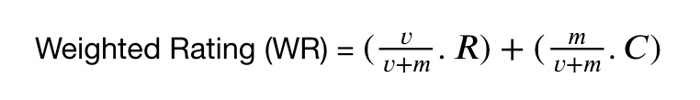

In [551]:
img

---
### Top popular Movies selection...
---
#### top movies selection various from company to company, hence I'll use the
#### IMDB **Weighted Rating(*WR*)** formula in this project:
---
---
##### here,
* *v* is the number of votes for the movie
* *m* is the minimum votes required to be listed in the chart
* *R* is the average rating of the movie
* C is the mean vote across the whole report
###### ***m***, the minimum votes required to be listed in the chart. I'll use 90th percentile as our cutoff. In other words, for a movie to feature in the charts, it must have more votes than at least 90% of the movies in the list.
---

In [552]:
vote_counts = movies_df["vote_count"].values

In [553]:
m = np.quantile(vote_counts, 0.90)

In [554]:
C = movies_df["vote_average"].mean() 

In [555]:

def weighted_ratings(df):
    v = df['vote_count']
    R = df['vote_average']

    return (v / (v + m) * R) + (m /(m + v) * C)


In [556]:
movies_df["wr"] = weighted_ratings(movies_df)

In [557]:
movies_df = movies_df.sort_values("wr", ascending=False)

movies_df.head(3)

,genres,tmdbId,imdb_id,original_language,overview,popularity,runtime,status,tagline,title,vote_average,vote_count,release_date,wr
105,"[Drama, Crime]",278,tt0111161,en,Framed in the 1940s for the double murder of h...,51.65,142,Released,Fear can hold you prisoner. Hope can set you f...,the shawshank redemption,8.5,8358.0,1994,8.248067
242,"[Drama, Crime]",238,tt0068646,en,"Spanning the years 1945 to 1955, a chronicle o...",41.11,175,Released,An offer you can't refuse.,the godfather,8.5,6024.0,2072,8.172528
2932,"[Drama, Action, Crime, Thriller]",155,tt0468569,en,Batman raises the stakes in his war on crime. ...,123.17,152,Released,Why So Serious?,the dark knight,8.3,12269.0,2008,8.143393


In [558]:
popular_movies = movies_df[["title", "popularity", "vote_average", "tmdbId", "status", "runtime", "release_date"]].head(150)               ### top 150 Popluar Movies

In [559]:
popular_movies

,title,popularity,vote_average,tmdbId,status,runtime,release_date
105,the shawshank redemption,51.65,8.5,278,Released,142,1994
242,the godfather,41.11,8.5,238,Released,175,2072
2932,the dark knight,123.17,8.3,155,Released,152,2008
981,fight club,63.87,8.3,550,Released,139,1999
95,pulp fiction,140.95,8.3,680,Released,154,1994
...,...,...,...,...,...,...,...
288,it's a wonderful life,15.03,8.0,1585,Released,130,2046
4164,nightcrawler,21.28,7.6,242582,Released,117,2014
2490,batman begins,28.51,7.5,272,Released,140,2005
1782,pirates of the caribbean: the curse of the bla...,47.33,7.5,22,Released,143,2003


In [560]:

img_links = list(map(get_poster_link, popular_movies["tmdbId"].tolist()))

popular_movies["img_link"] = img_links

In [561]:
popular_movies = popular_movies[["title", "popularity", "vote_average", "status", "runtime", "img_link", "release_date"]]

popular_movies.head()

,title,popularity,vote_average,status,runtime,img_link,release_date
105,the shawshank redemption,51.65,8.5,Released,142,http://image.tmdb.org/t/p/w185/hBcY0fE9pfXzvVa...,1994
242,the godfather,41.11,8.5,Released,175,http://image.tmdb.org/t/p/w185/3bhkrj58Vtu7enY...,2072
2932,the dark knight,123.17,8.3,Released,152,http://image.tmdb.org/t/p/w185/qJ2tW6WMUDux911...,2008
981,fight club,63.87,8.3,Released,139,http://image.tmdb.org/t/p/w185/pB8BM7pdSp6B6Ih...,1999
95,pulp fiction,140.95,8.3,Released,154,http://image.tmdb.org/t/p/w185/d5iIlFn5s0ImszY...,1994


---
#### we're almost done...!!!
---
---
#### now, the model saving part...

In [562]:
from pickle import dump, load

In [563]:
dump(similarity_scores, open("similarity_scores.bin", "wb"))

In [564]:
dump(final_train_df, open("final_train_df.bin", "wb")) 

In [565]:
dump(movies_df, open("movies_df.bin", "wb"))

In [566]:
dump(popular_movies, open("popular_movies.bin", "wb"))

In [567]:
similarity_scores = load(open("similarity_scores.bin", "rb"))

similarity_scores

array([[1.        , 0.06354107, 0.04529883, ..., 0.        , 0.04706208,
        0.01454017],
       [0.06354107, 1.        , 0.03300492, ..., 0.04811252, 0.05143445,
        0.09534626],
       [0.04529883, 0.03300492, 1.        , ..., 0.        , 0.        ,
        0.01888137],
       ...,
       [0.        , 0.04811252, 0.        , ..., 1.        , 0.33407655,
        0.34405118],
       [0.04706208, 0.05143445, 0.        , ..., 0.33407655, 1.        ,
        0.47079191],
       [0.01454017, 0.09534626, 0.01888137, ..., 0.34405118, 0.47079191,
        1.        ]])

In [568]:
movies_df.loc[movies_df["title"] == 'american psycho']["overview"].tolist()

['A wealthy New York investment banking executive hides his alternate psychopathic ego from his co-workers and friends as he escalates deeper into his illogical, gratuitous fantasies.']

In [569]:
# nltk.word_tokenize("The animal didn't cross the street because it was, too tired")